<a href="https://colab.research.google.com/github/Ajay1994/PropagandaDetection/blob/master/Proppy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('drive/My Drive/Cognitive Vigilance/')
!pwd

/content/drive/My Drive/Cognitive Vigilance


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [0]:
_header = ["article_text", "event_location", "average_tone", "article_date", "article_ID", "article_URL", "MBFC_factuality_label", "article_URL", "MBFC_factuality_label", "URL_to_MBFC_page", "source_name", "MBFC_notes_about_source", "MBFC_bias_label", "source_URL", "propaganda_label"]
train_dataset = pd.read_csv("proppy_1.0.train.tsv", sep="\t", header=None)
dev_dataset = pd.read_csv("proppy_1.0.dev.tsv", sep="\t", header=None)
test_dataset = pd.read_csv("proppy_1.0.test.tsv", sep="\t", header=None)
train_dataset.columns, dev_dataset.columns, test_dataset.columns = _header, _header, _header

Train Dataset Length :  35986
Dev Dataset Length :  5125
Test Dataset Length :  10159


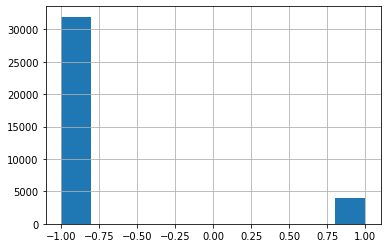

In [30]:
print("Train Dataset Length : ", len(train_dataset))
print("Dev Dataset Length : ", len(dev_dataset))
print("Test Dataset Length : ", len(test_dataset))
train_dataset['propaganda_label'].hist()

In [0]:
X_train = train_dataset['article_text']
Y_train = train_dataset['propaganda_label']
X_dev = dev_dataset['article_text']
Y_dev = dev_dataset['propaganda_label']
X_test = test_dataset['article_text']
Y_test = test_dataset['propaganda_label']

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=True)
cv.fit(X_train)
XTR = cv.transform(X_train)
XD = cv.transform(X_dev)
XT = cv.transform(X_test)

In [29]:
XTR.shape

(35986, 177589)

**Building Classifier** using Logistic Regression [Fine-tuning on various learning rates]

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
for c in [0.01, 0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c, max_iter = 10000)
    lr.fit(XTR, Y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(Y_dev, lr.predict(XD))))

Accuracy for C=0.01: 0.9596097560975609
Accuracy for C=0.05: 0.9633170731707317
Accuracy for C=0.25: 0.9642926829268292
Accuracy for C=0.5: 0.9629268292682926
Accuracy for C=1: 0.9623414634146341


**Train Final Model** : Best learning rate 0.25

In [34]:
final_model = LogisticRegression(C=0.25, max_iter = 10000)
final_model.fit(XTR, Y_train)
print ("Final Accuracy: %s" 
       % accuracy_score(Y_test, final_model.predict(XT)))

Final Accuracy: 0.9622994389211537
